In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data=pd.read_csv(r'F:\Kaggle Data Sets\BlackFridaySalesPrediction\train.csv')

In [6]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
train_data.shape

(550068, 12)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
train_data['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [11]:
train_data['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [13]:
train_data['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [14]:
train_data['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
train_data['Age']=le.fit_transform(train_data['Age'])

In [18]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                             int32
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [19]:
train_data['Gender']=le.fit_transform(train_data['Gender'])
train_data['City_Category']=le.fit_transform(train_data['City_Category'])

In [20]:
train_data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [21]:
train_data['Stay_In_Current_City_Years']=le.fit_transform(train_data['Stay_In_Current_City_Years'])

In [22]:
train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int32
Age                             int32
Occupation                      int64
City_Category                   int32
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [24]:
train_data['User_ID'].nunique()

5891

In [25]:
train_data['Product_ID'].nunique()

3631

In [26]:
train_data['U_ID']=le.fit_transform(train_data['User_ID'])
train_data['P_ID']=le.fit_transform(train_data['Product_ID'])

In [27]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,U_ID,P_ID
0,1000001,P00069042,0,0,10,0,2,0,3,NaN,NaN,8370,0,672
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200,0,2376
2,1000001,P00087842,0,0,10,0,2,0,12,NaN,NaN,1422,0,852
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,NaN,1057,0,828
4,1000002,P00285442,1,6,16,2,4,0,8,NaN,NaN,7969,1,2734


In [76]:
X=train_data.drop(['Product_Category_1','Product_Category_2','Product_Category_3','User_ID','Product_ID','Purchase'],axis=1)
y=train_data['Purchase']

In [78]:
X.shape

(550068, 8)

In [40]:
import random
data=train_data.sample(frac=0.33)

In [41]:
data.shape

(181522, 14)

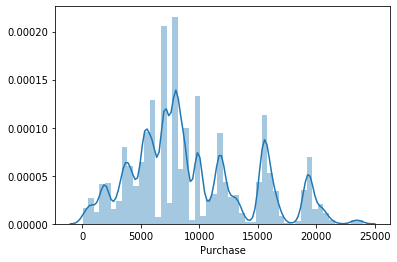

In [42]:
sns.distplot(train_data['Purchase'])

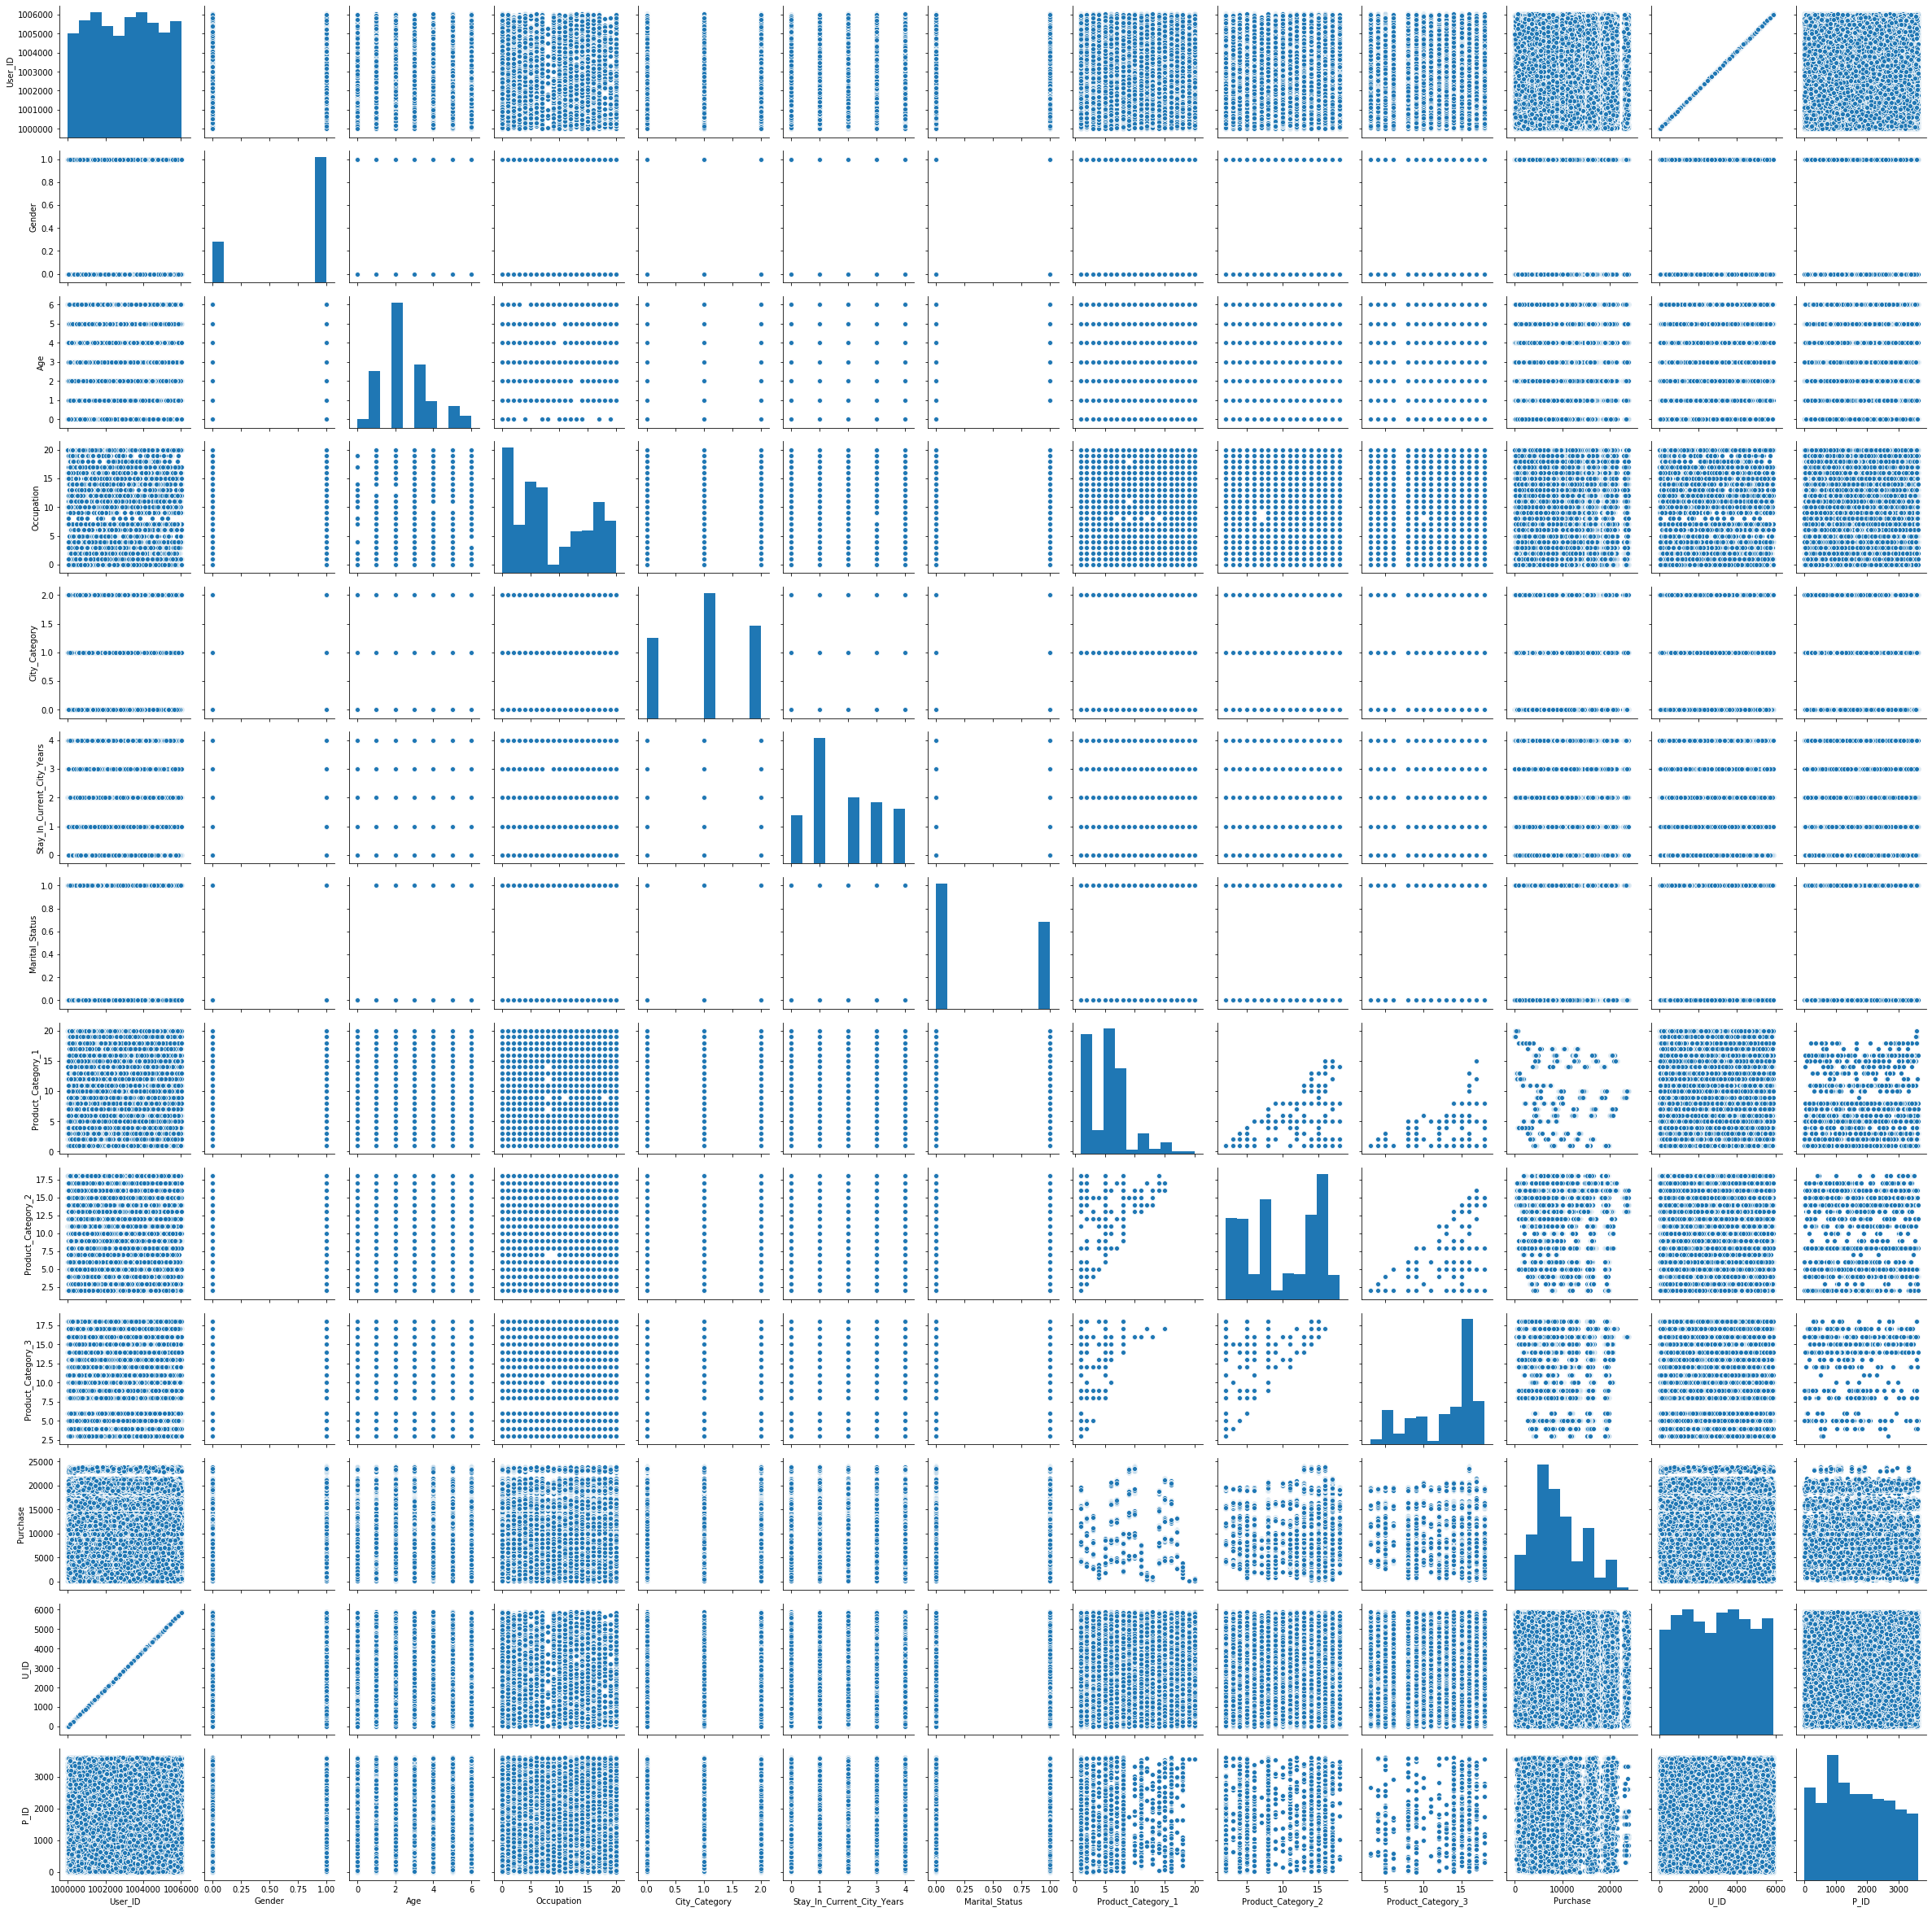

In [43]:
sns.pairplot(data)

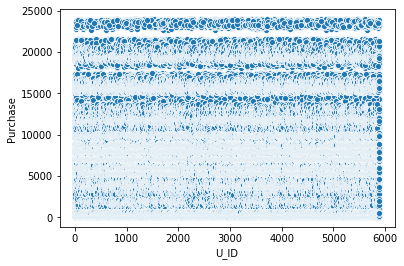

In [44]:
sns.scatterplot(x='U_ID',y='Purchase',data=train_data)

In [45]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'U_ID', 'P_ID'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop(['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3','Purchase'],axis=1),data['Purchase'],test_size=0.33,random_state=1)

In [48]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [49]:
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [53]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))


In [54]:
type(rmse)

numpy.float64

In [55]:
rfr.score(X_test,y_test)

0.6640620404672235

In [60]:
importance=rfr.feature_importances_

Feature: 0, Score: 0.00936
Feature: 1, Score: 0.03576
Feature: 2, Score: 0.05694
Feature: 3, Score: 0.02072
Feature: 4, Score: 0.03312
Feature: 5, Score: 0.01200
Feature: 6, Score: 0.10751
Feature: 7, Score: 0.72460


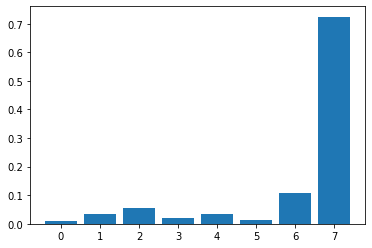

In [62]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [79]:
rfr.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [64]:
rfr.score(X,y)

0.9999999998491583

In [65]:
test_data=pd.read_csv(r'F:\Kaggle Data Sets\BlackFridaySalesPrediction\test.csv')

In [66]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [67]:
test_data.shape

(233599, 11)

In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [69]:
test_data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [71]:
test_data['U_ID']=le.fit_transform(test_data['User_ID'])
test_data['P_ID']=le.fit_transform(test_data['Product_ID'])
test_data['Gender']=le.fit_transform(test_data['Gender'])
test_data['Age']=le.fit_transform(test_data['Age'])
test_data['City_Category']=le.fit_transform(test_data['City_Category'])
test_data['Stay_In_Current_City_Years']=le.fit_transform(test_data['Stay_In_Current_City_Years'])

In [72]:
test_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
U_ID                            int64
P_ID                            int32
dtype: object

In [73]:
X_test=test_data.drop(['User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'],axis=1)

In [74]:
X_test.shape

(233599, 8)

In [75]:
X.shape

(550068, 9)

In [80]:
y_pred=rfr.predict(X_test)

In [82]:
import csv
fields=['Purchase','User_ID','Product_ID']
row=list()
for i in test_data.index:
    row_i=[y_pred[i],test_data.loc[i,'User_ID'],test_data.loc[i,'Product_ID']]
    row.append(row_i)
    
row=np.array(row)
filename='SalesOutput.csv'

with open(filename,'w',newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(row)
    